<details>
<summary>Table of Contents</summary>

- [1. Comparison of Scalers and Loss Functions](#1-comparison-of-scalers-and-loss-functions)
- [2. Standard Scaler Informer plots](#2-standard-scaler-informer-plots)
- [3. Standard Scaler PatchTST plots](#3-standard-scaler-patchtst-plots)
- [4. MinMax (0, 1) ReLU Informer plots](#4-minmax-0-1-relu-informer-plots)
- [5. MinMax (0, 1) ReLU PatchTST plots](#5-minmax-0-1-relu-patchtst-plots)
- [6. MinMax (0, 5) ReLU Informer plots](#6-minmax-0-5-relu-informer-plots)
- [7. MinMax (0, 1) ReLU PatchTST plots](#7-minmax-0-5-relu-patchtst-plots)

</details>

In this notebook we show results of the previous notebook to be able to compare loss functions and scalers. In addition, we plot true values and predictions to see their distributions for each loss function and prediction length.

In [1]:
import shutil
import pandas as pd
from utils.error_analysis import plot_error_results

# 1. Comparison of Scalers and Loss Functions

In [2]:
# Load the data and keep important columns
standard_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
standard_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

minmax_0_1_relu_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled_minmax_0_1_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
minmax_0_1_relu_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled_minmax_0_1_relu_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

minmax_0_5_relu_informer = pd.read_csv('./dataset_results/informer_loss_functions_results_unscaled_minmax_0_5_relu_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]
minmax_0_5_relu_patchtst = pd.read_csv('./dataset_results/patchtst_loss_functions_results_unscaled_minmax_0_5_relu_IT.csv')[['Pred_len', 'Loss_function', 'RMSE', 'MAE']]

# Set 'Pred_len' and 'Loss_function' as index for each dataframe
standard_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
standard_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

minmax_0_1_relu_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
minmax_0_1_relu_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

minmax_0_5_relu_informer.set_index(['Pred_len', 'Loss_function'], inplace=True)
minmax_0_5_relu_patchtst.set_index(['Pred_len', 'Loss_function'], inplace=True)

# Concatenate all results
informer_df = pd.concat([
    standard_informer, 
    minmax_0_1_relu_informer, 
    minmax_0_5_relu_informer
], axis=1)

patchtst_df = pd.concat([
    standard_patchtst, 
    minmax_0_1_relu_patchtst, 
    minmax_0_5_relu_patchtst
], axis=1)

# Define the scalers and metrics
scalers = ['Standard', 'MinMax (0, 1)', 'MinMax (0, 5)']
metrics = ['RMSE', 'MAE']

# Create the MultiIndex for columns
multi_index_columns = pd.MultiIndex.from_product([scalers, metrics], names=['Scaler', 'Metrics'])

# Assign the MultiIndex to dataframes
informer_df.columns = multi_index_columns
patchtst_df.columns = multi_index_columns

# Groupby iterations
informer_df = informer_df.groupby(['Pred_len', 'Loss_function']).mean()
patchtst_df = patchtst_df.groupby(['Pred_len', 'Loss_function']).mean()

# Round for better readability
informer_df = informer_df.round(2)
patchtst_df = patchtst_df.round(2)


In [3]:
# Final with RelU activation
informer_df

Scaler                 Standard          MinMax (0, 1)          MinMax (0, 5)  \
Metrics                    RMSE      MAE          RMSE      MAE          RMSE   
Pred_len Loss_function                                                          
24       MAE            1266.78   791.10       1239.72   775.14       1251.96   
         MSE            1291.91   844.19       1273.46   831.47       1324.84   
         RMSE           1293.71   840.17       1285.36   832.07       1338.58   
96       MAE            1786.78  1147.43       1836.68  1179.32       1707.09   
         MSE            1799.34  1226.97       1843.14  1218.55       1822.81   
         RMSE           1833.06  1241.08       1825.91  1205.12       1872.24   
168      MAE            2074.75  1328.41       2048.60  1310.84       2007.86   
         MSE            2076.82  1384.67       2056.65  1349.74       2030.00   
         RMSE           2051.11  1365.75       2056.85  1345.37       2072.56   

Scaler                           
Metrics                     MAE  
Pred_len Loss_function           
24       MAE             787.27  
         MSE             847.00  
         RMSE            850.85  
96       MAE            1105.28  
         MSE            1209.51  
         RMSE           1229.89  
168      MAE            1278.46  
         MSE            1323.80  
         RMSE           1352.66

In [4]:
patchtst_df

Scaler                 Standard          MinMax (0, 1)          MinMax (0, 5)  \
Metrics                    RMSE      MAE          RMSE      MAE          RMSE   
Pred_len Loss_function                                                          
24       MAE            1225.80   801.97       1132.15   714.19       1219.12   
         MSE            1217.74   860.22       1281.99   848.01       1222.98   
         RMSE           1230.93   867.15       1370.31   882.73       1370.27   
96       MAE            1722.47  1152.57       1619.61  1038.47       1711.23   
         MSE            1756.95  1202.94       1777.80  1176.84       1777.42   
         RMSE           1741.80  1192.19       1757.75  1163.19       1757.64   
168      MAE            1862.22  1245.29       1846.45  1205.49       1846.32   
         MSE            1887.86  1289.80       1908.54  1264.51       1908.05   
         RMSE           1872.29  1278.21       1889.71  1251.01       1889.56   

Scaler                           
Metrics                     MAE  
Pred_len Loss_function           
24       MAE             769.36  
         MSE             799.90  
         RMSE            882.70  
96       MAE            1116.17  
         MSE            1176.60  
         RMSE           1163.12  
168      MAE            1205.38  
         MSE            1264.19  
         RMSE           1250.91

# 2. Standard Scaler Informer plots
We plot unscaled data for each column.

The more the line is narrow and corresponds to the 45 degree line and symmetric around it - the better. Please note that we observe such patterns because of original shapes of distributions within our data. 


Dark spots mean more observations.

load actual          min value: 15334.00   max value: 50071.76   negative values:       0.00%
solar generation     min value: -150.21    max value: 11389.00   negative values:      33.03%
wind onshore         min value: -255.79    max value: 7448.00    negative values:       0.18%


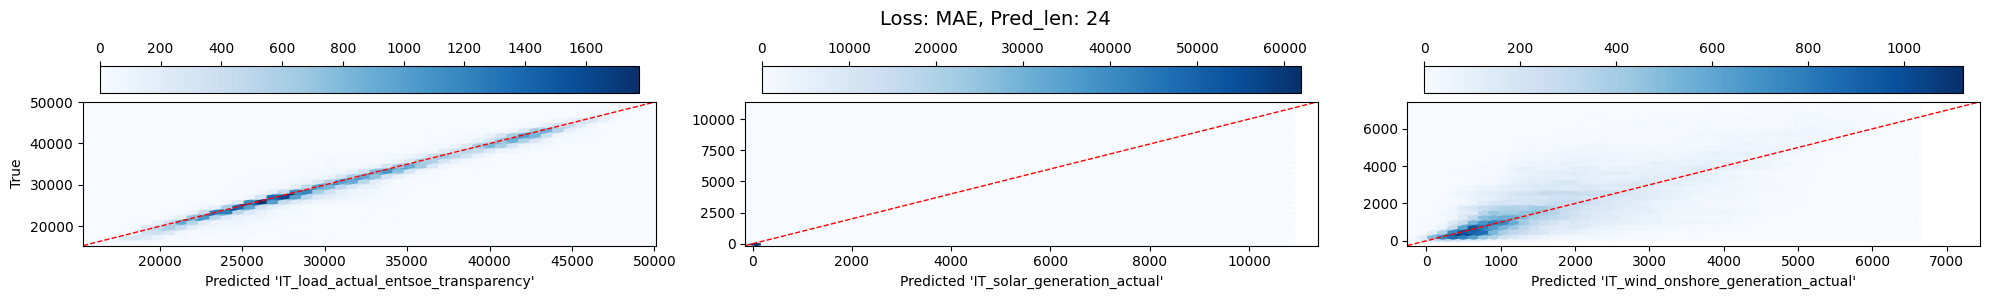

load actual          min value: 15327.04   max value: 50145.37   negative values:       0.00%
solar generation     min value: -438.91    max value: 11389.00   negative values:      29.18%
wind onshore         min value: -200.58    max value: 7448.00    negative values:       0.13%


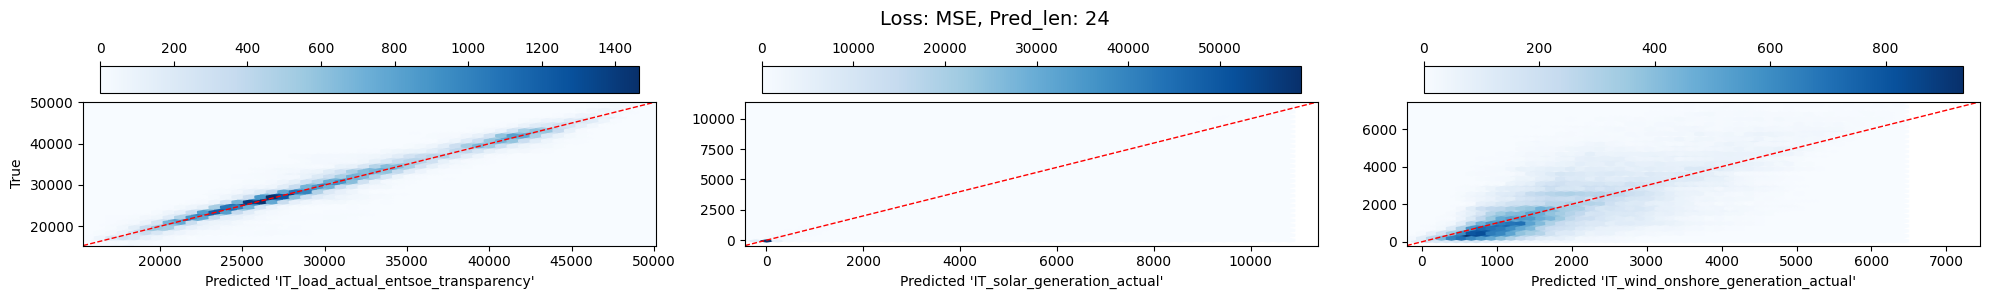

load actual          min value: 14995.15   max value: 49964.00   negative values:       0.00%
solar generation     min value: -342.12    max value: 11389.00   negative values:      20.28%
wind onshore         min value: -132.90    max value: 7448.00    negative values:       0.06%


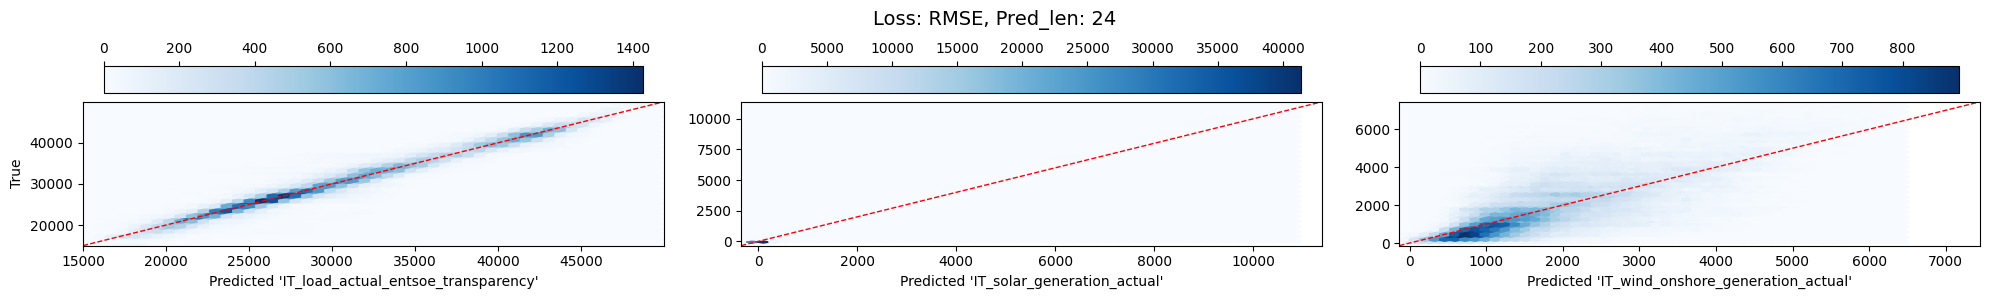

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -628.39    max value: 11389.00   negative values:      31.81%
wind onshore         min value: -432.59    max value: 7448.00    negative values:       0.05%


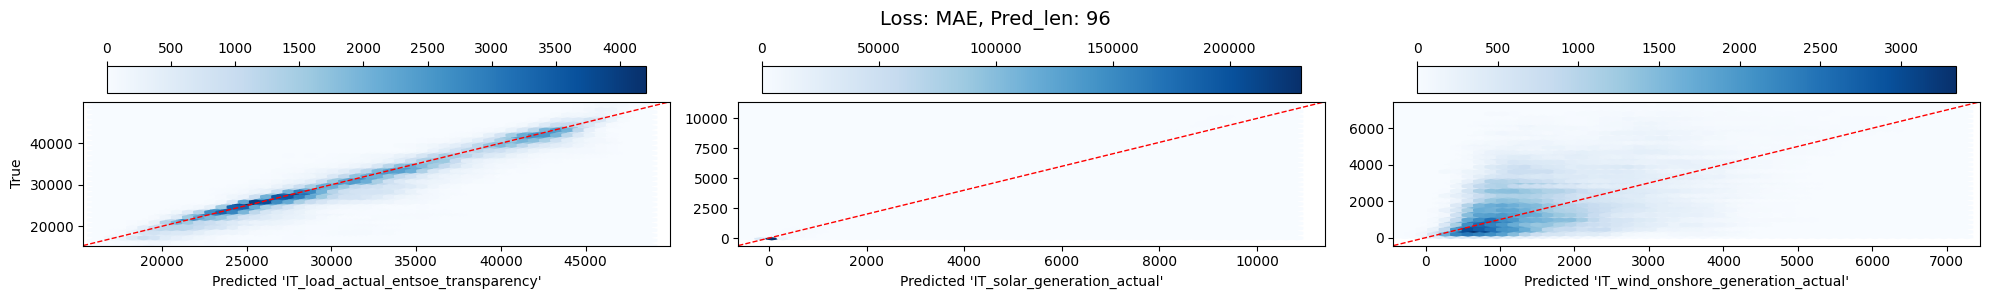

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1418.78   max value: 11389.00   negative values:      26.21%
wind onshore         min value: -345.66    max value: 7448.00    negative values:       0.03%


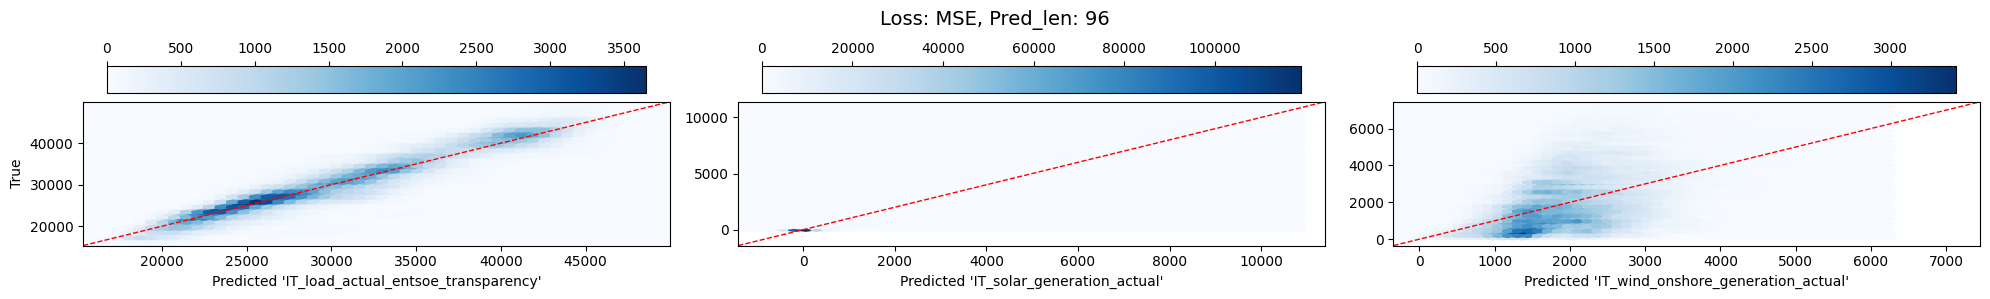

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1351.17   max value: 11389.00   negative values:      27.31%
wind onshore         min value: -313.91    max value: 7448.00    negative values:       0.04%


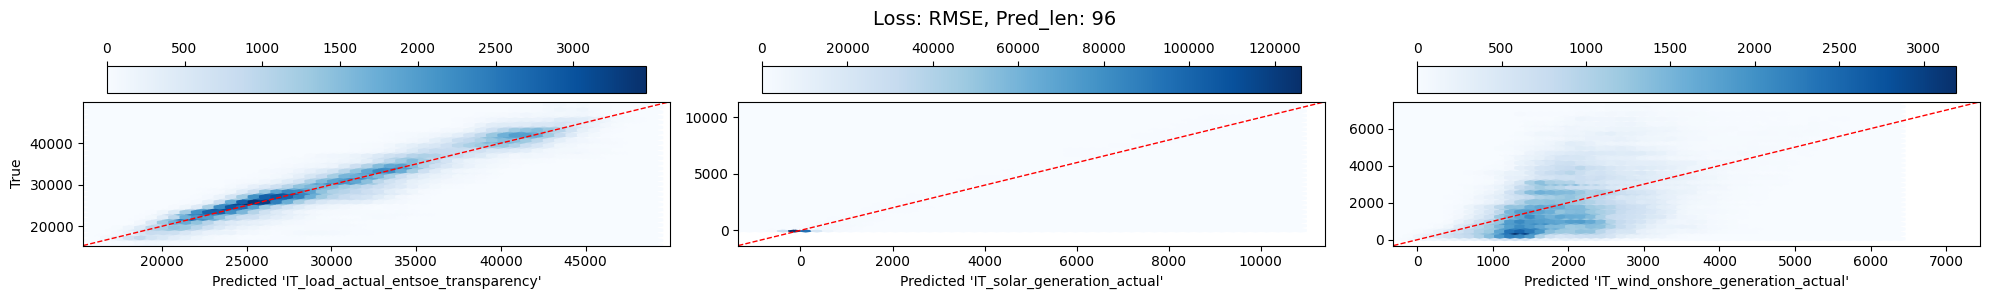

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -487.26    max value: 11389.00   negative values:      25.13%
wind onshore         min value: -390.55    max value: 7448.00    negative values:       0.06%


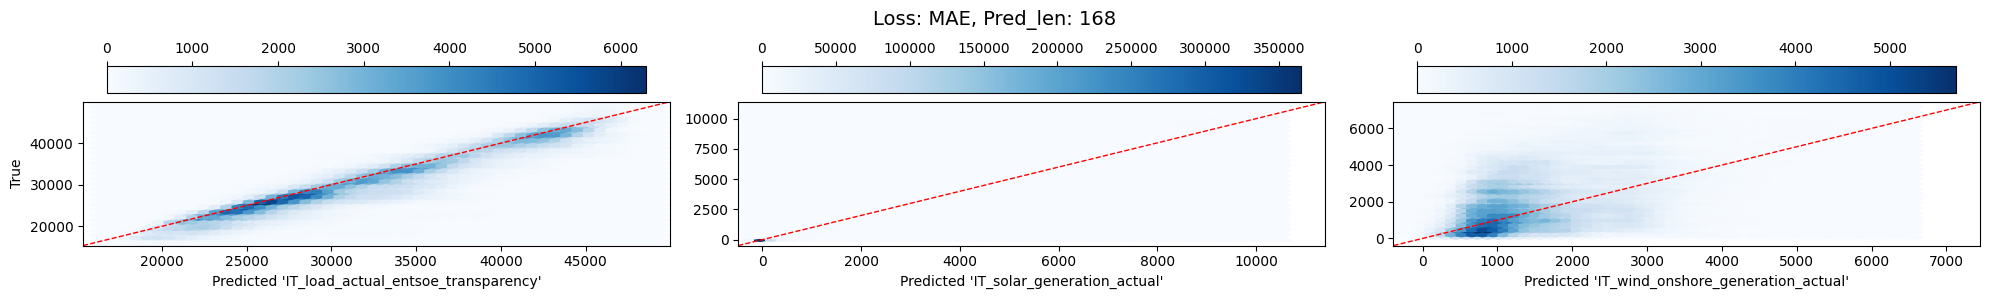

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1282.20   max value: 11389.00   negative values:      29.03%
wind onshore         min value: -121.63    max value: 7448.00    negative values:       0.00%


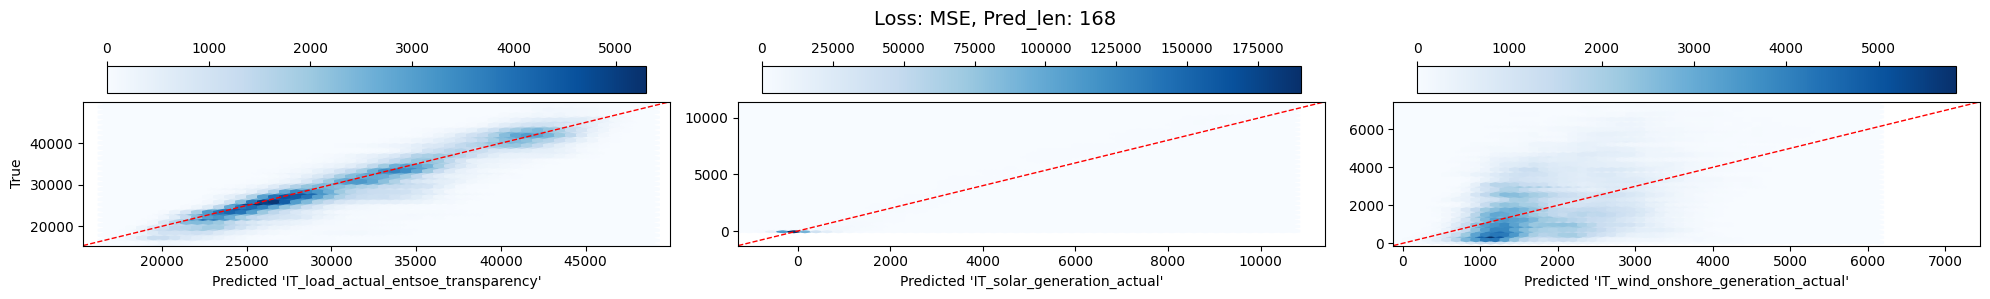

load actual          min value: 15334.00   max value: 49964.00   negative values:       0.00%
solar generation     min value: -1049.34   max value: 11389.00   negative values:      28.16%
wind onshore         min value: -170.52    max value: 7448.00    negative values:       0.01%


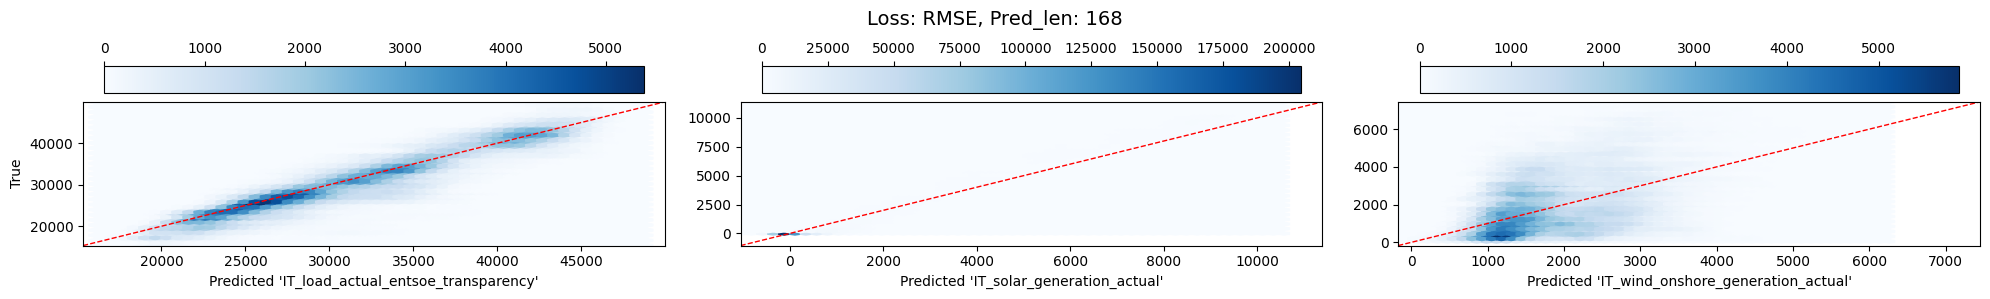

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [5]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled", dataset="IT")
    print("-"*160)

# 3. Standard Scaler PatchTST plots

load actual          min value: 13292.38   max value: 50115.27   negative values:       0.00%
solar generation     min value: -2528.62   max value: 11529.31   negative values:      18.22%
wind onshore         min value: -2609.61   max value: 7448.00    negative values:       0.46%


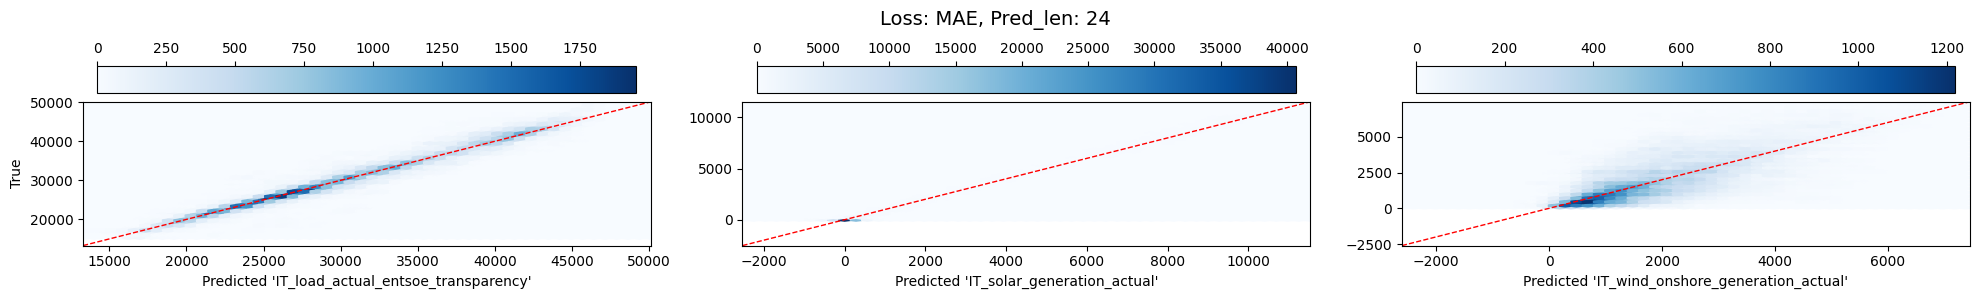

load actual          min value: 13896.30   max value: 50351.40   negative values:       0.00%
solar generation     min value: -2513.58   max value: 11418.62   negative values:      23.07%
wind onshore         min value: -703.91    max value: 7448.00    negative values:       0.35%


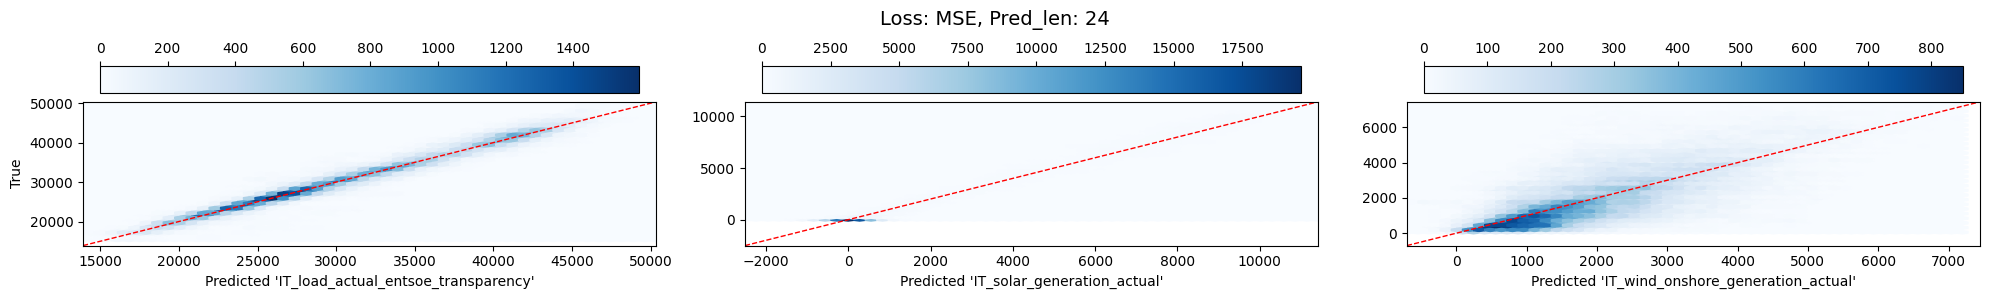

load actual          min value: 13453.73   max value: 50175.71   negative values:       0.00%
solar generation     min value: -2507.20   max value: 11531.39   negative values:      22.68%
wind onshore         min value: -490.15    max value: 7448.00    negative values:       0.24%


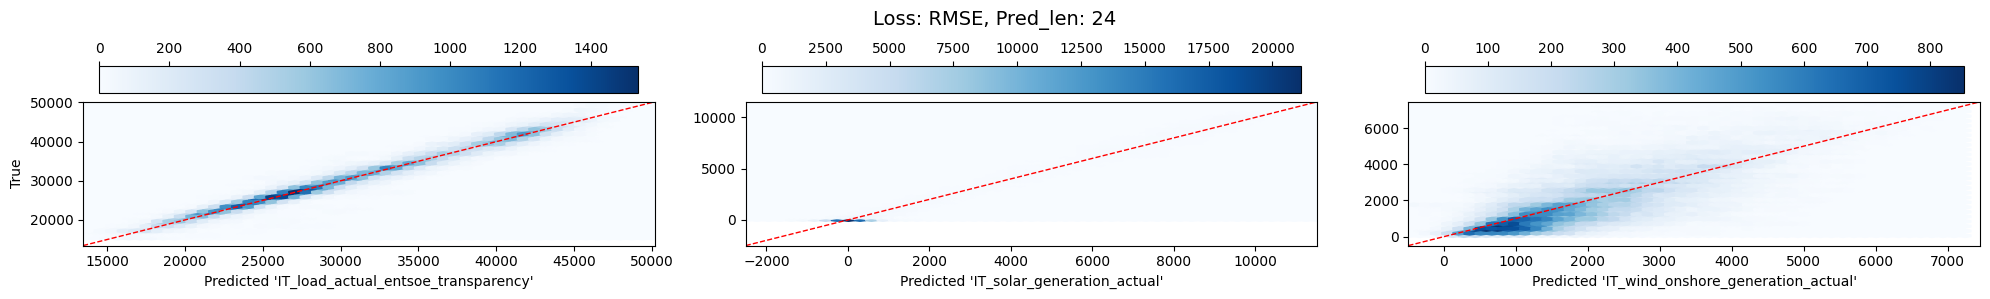

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 12919.14   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4351.86   max value: 11794.64   negative values:      21.40%
wind onshore         min value: -683.66    max value: 7448.00    negative values:       0.17%


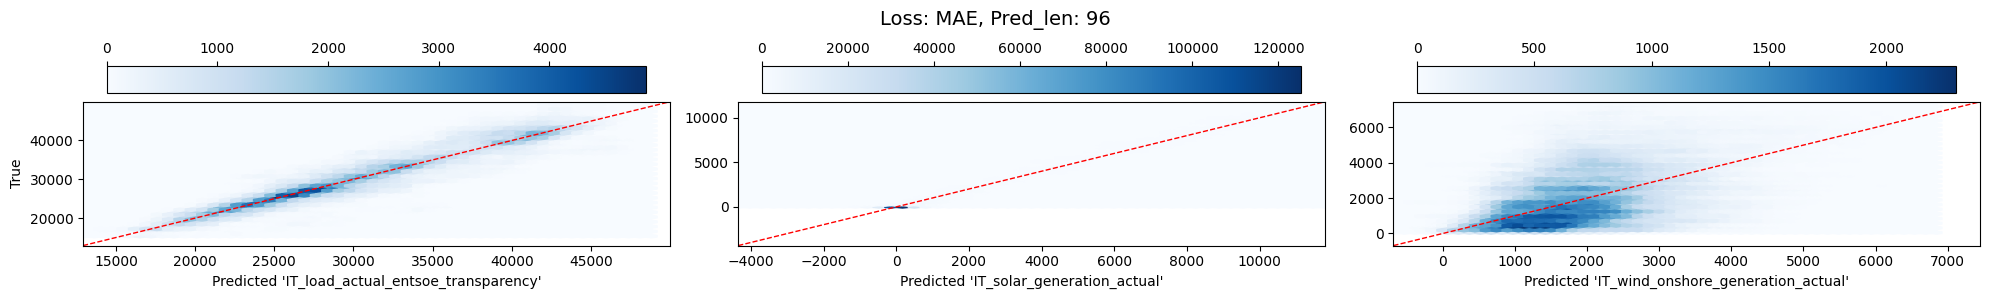

load actual          min value: 12513.14   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4808.31   max value: 11850.28   negative values:      24.45%
wind onshore         min value: -580.43    max value: 7448.00    negative values:       0.06%


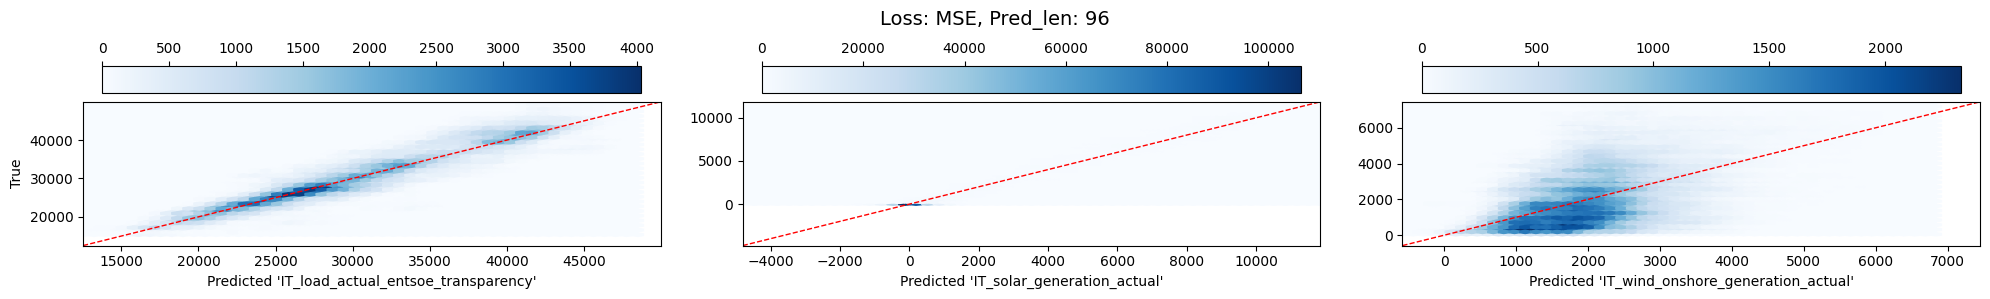

load actual          min value: 12477.97   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4856.08   max value: 12013.00   negative values:      24.31%
wind onshore         min value: -582.92    max value: 7448.00    negative values:       0.06%


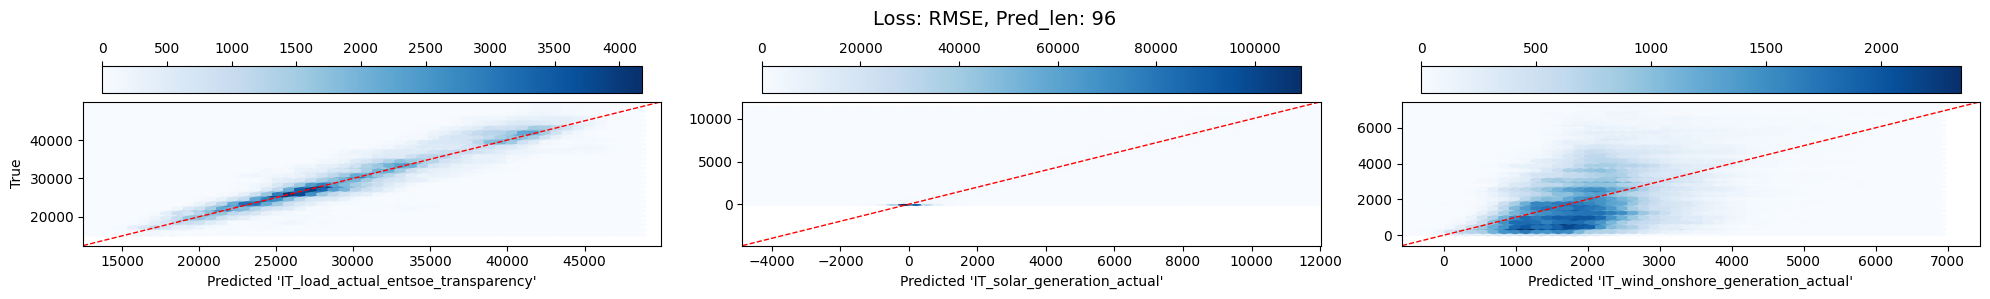

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 12649.69   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4390.63   max value: 11724.92   negative values:      22.65%
wind onshore         min value: -699.74    max value: 7448.00    negative values:       0.08%


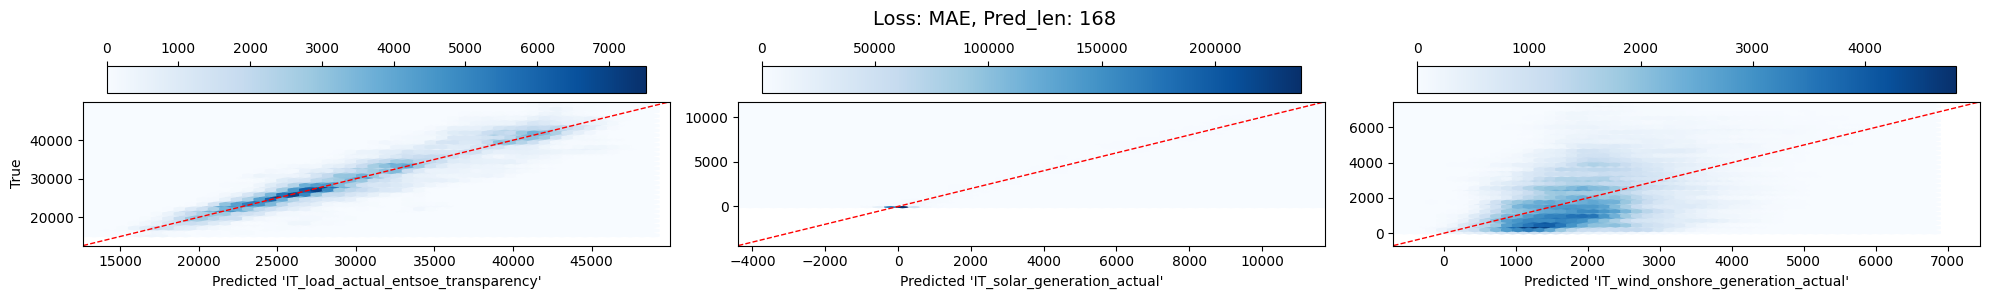

load actual          min value: 12261.53   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4867.21   max value: 11755.26   negative values:      25.87%
wind onshore         min value: -558.37    max value: 7448.00    negative values:       0.03%


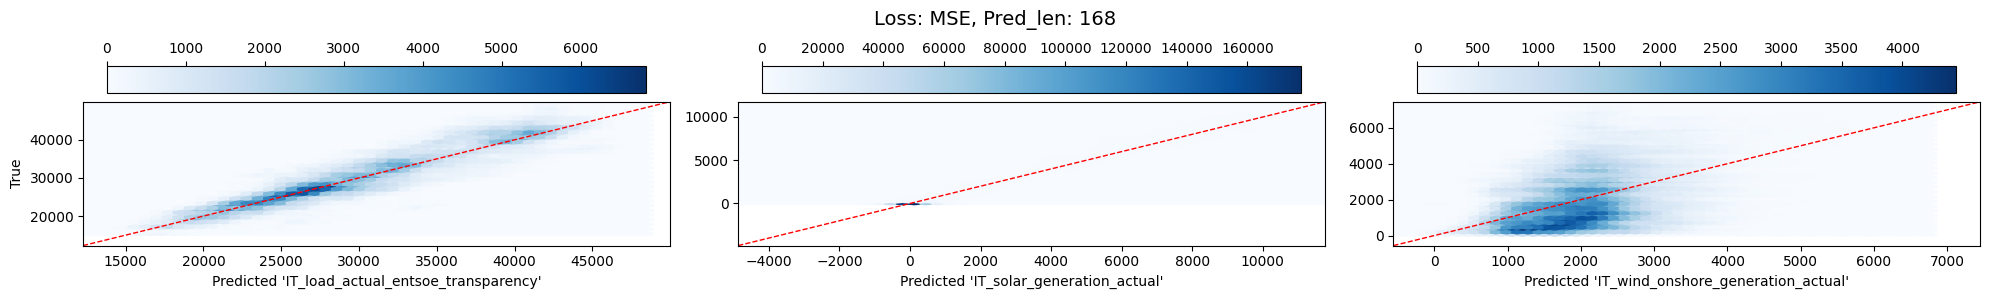

load actual          min value: 12199.60   max value: 49964.00   negative values:       0.00%
solar generation     min value: -4865.35   max value: 11818.33   negative values:      26.02%
wind onshore         min value: -576.52    max value: 7448.00    negative values:       0.03%


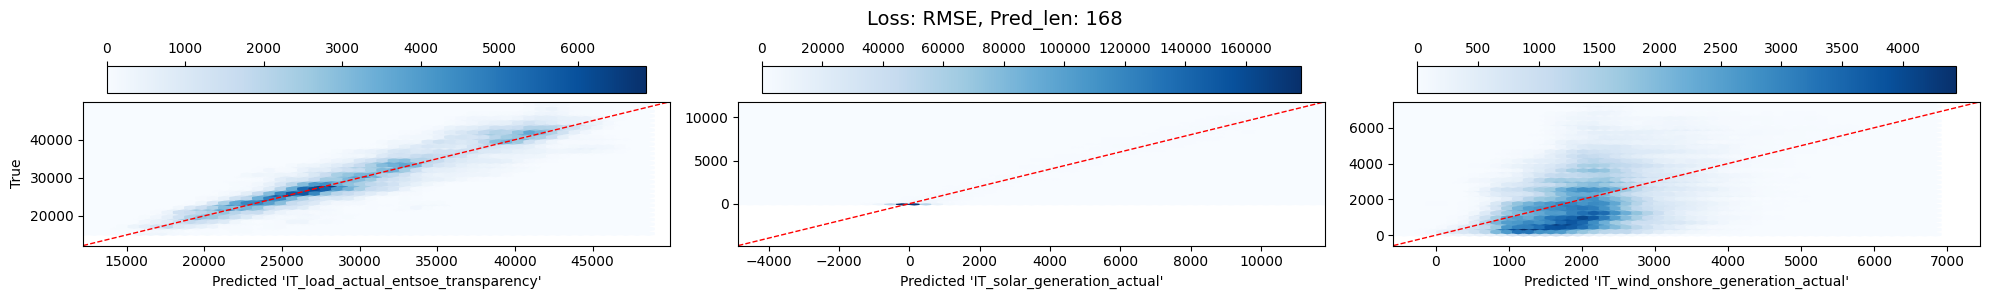

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [8]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("PatchTST", loss, seq_len=512, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path="./standard_unscaled", dataset="IT")
    print("-"*160)

# 4. MinMax (0, 1) ReLU Informer plots

In [9]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_0_1_relu_unscaled_IT', dataset="IT")
    print("-"*160)


FileNotFoundError: [Errno 2] No such file or directory: './minmax_0_1_relu_unscaled/DE_96_24_loss_choice_for_DE_Informer_custom_ftM_sl96_ll5_pl24_dm512_nh8_el2_dl1_df2048_fc5_ebtimeF_dtTrue_lossMAE_Exp_0/pred.npy'

# 5. MinMax (0, 1) ReLU PatchTST plots

load actual          min value: 31587.75   max value: 75551.00  
solar generation     min value: 0.00       max value: 33588.36  
wind generation      min value: 135.00     max value: 49250.23  
wind offshore        min value: 0.00       max value: 7114.02   
wind onshore         min value: 119.00     max value: 42780.51  


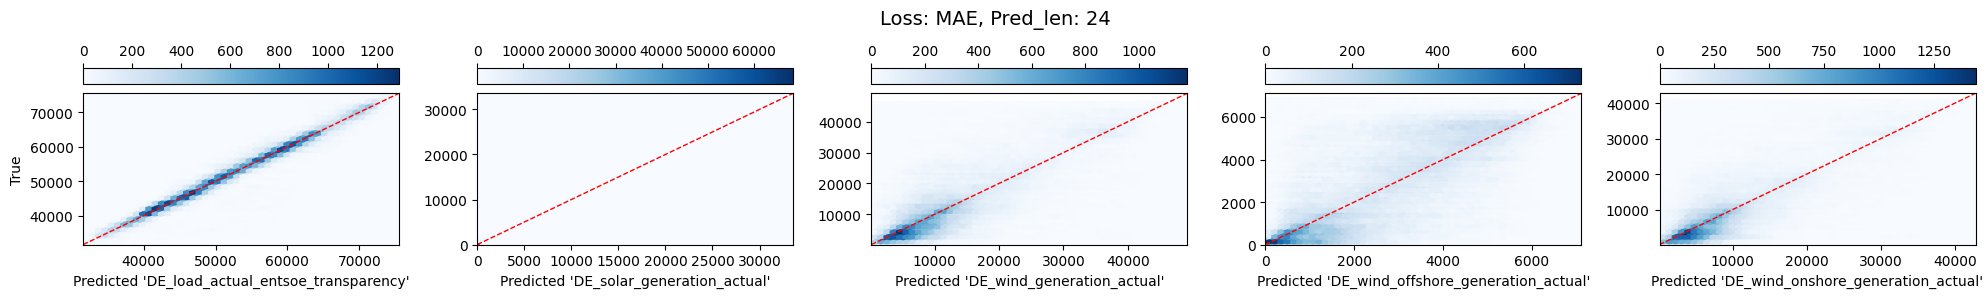

load actual          min value: 31335.98   max value: 76722.77  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 48093.71  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 41868.66  


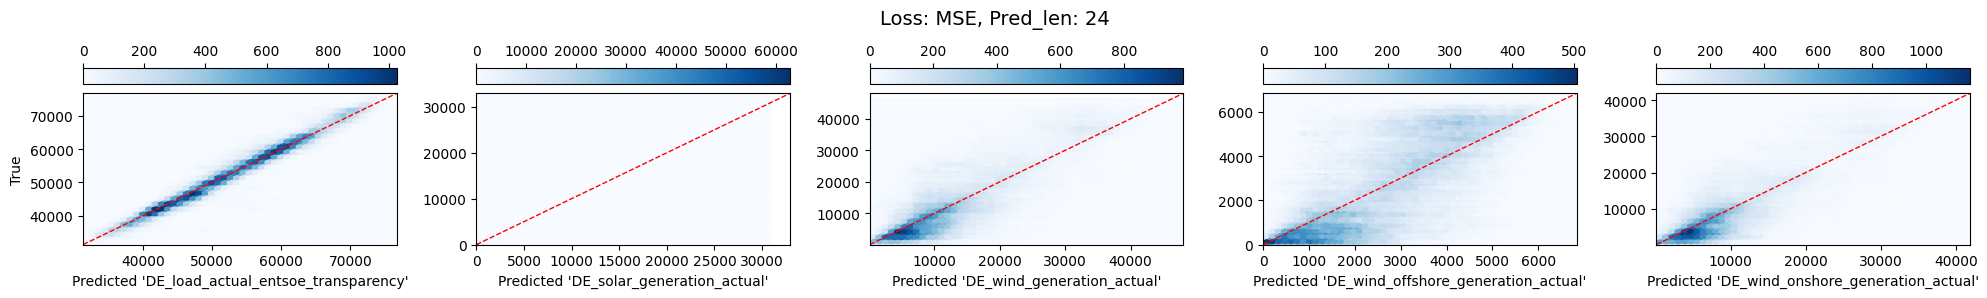

load actual          min value: 31539.59   max value: 75851.88  
solar generation     min value: 0.00       max value: 33227.02  
wind generation      min value: 135.00     max value: 48635.93  
wind offshore        min value: 0.00       max value: 6903.65   
wind onshore         min value: 119.00     max value: 42714.83  


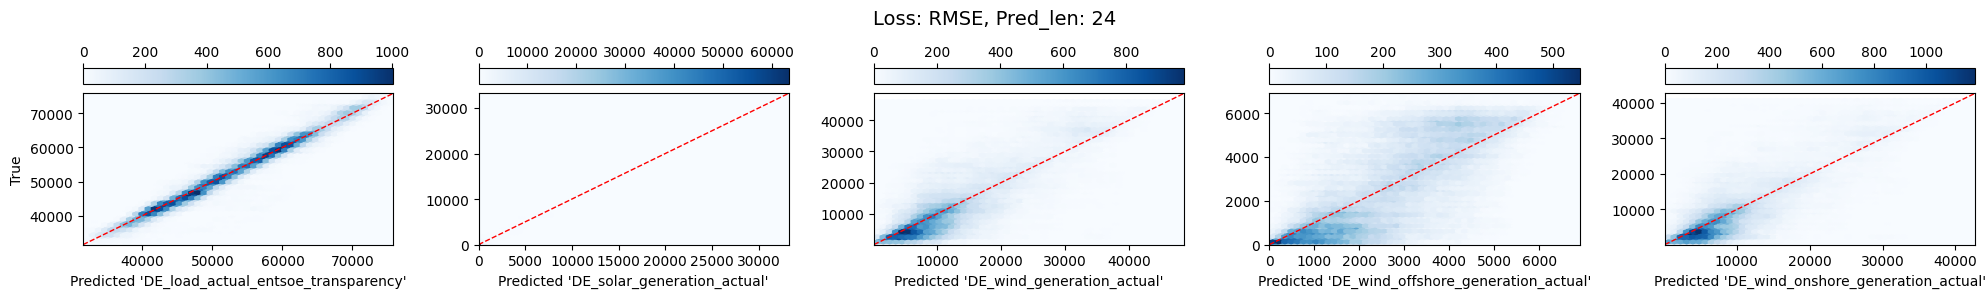

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31307.00   max value: 75551.00  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 47922.72  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 41885.04  


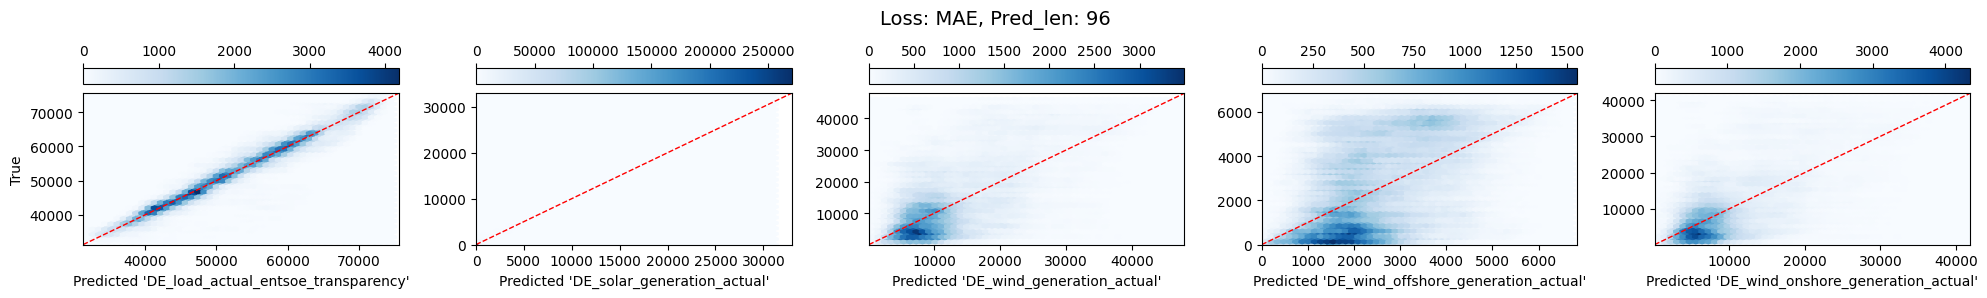

load actual          min value: 31307.00   max value: 75855.28  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


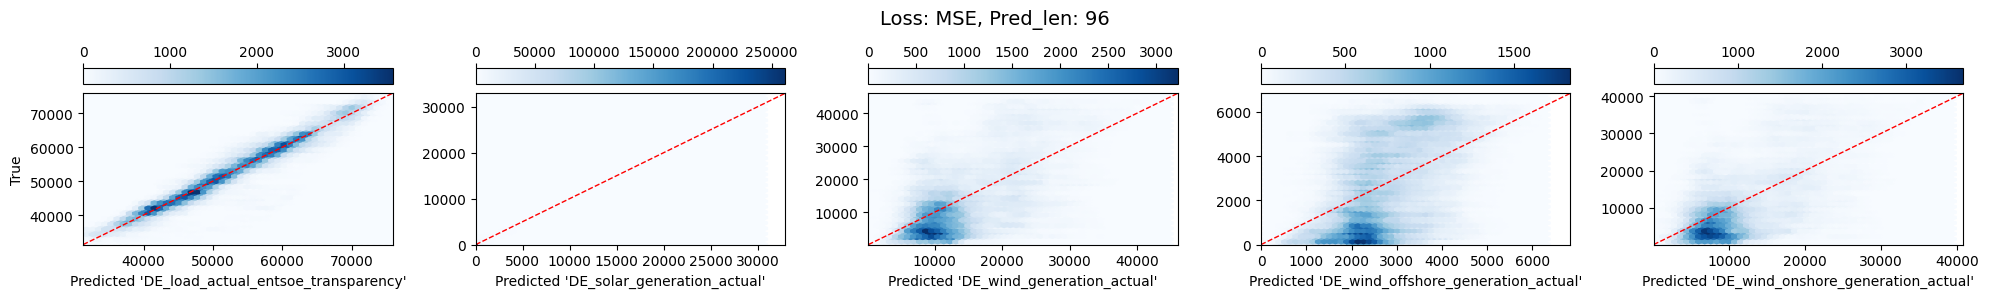

load actual          min value: 31307.00   max value: 75692.48  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


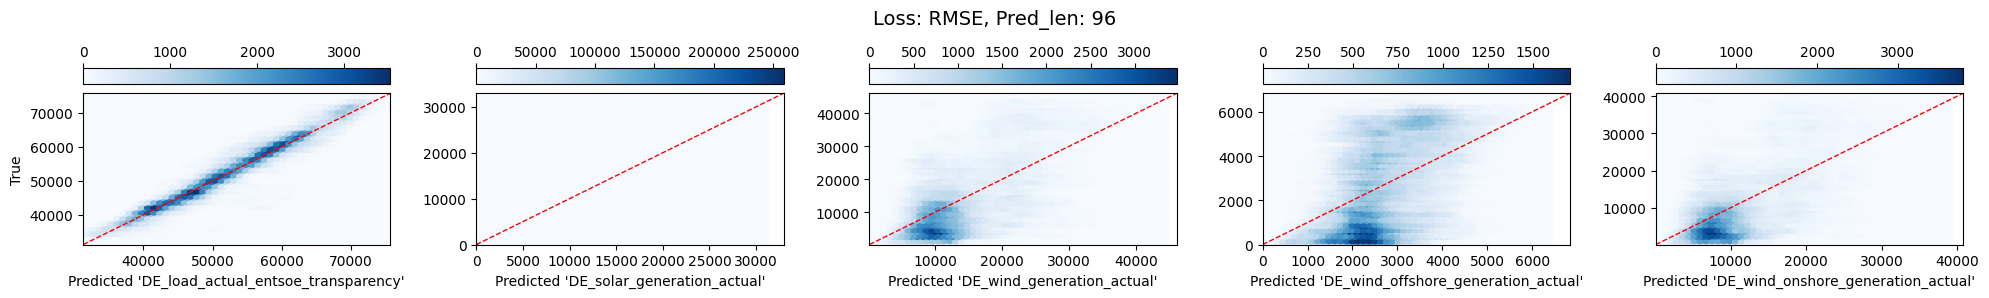

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31923.00   max value: 76676.21  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 48092.82  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 42611.30  


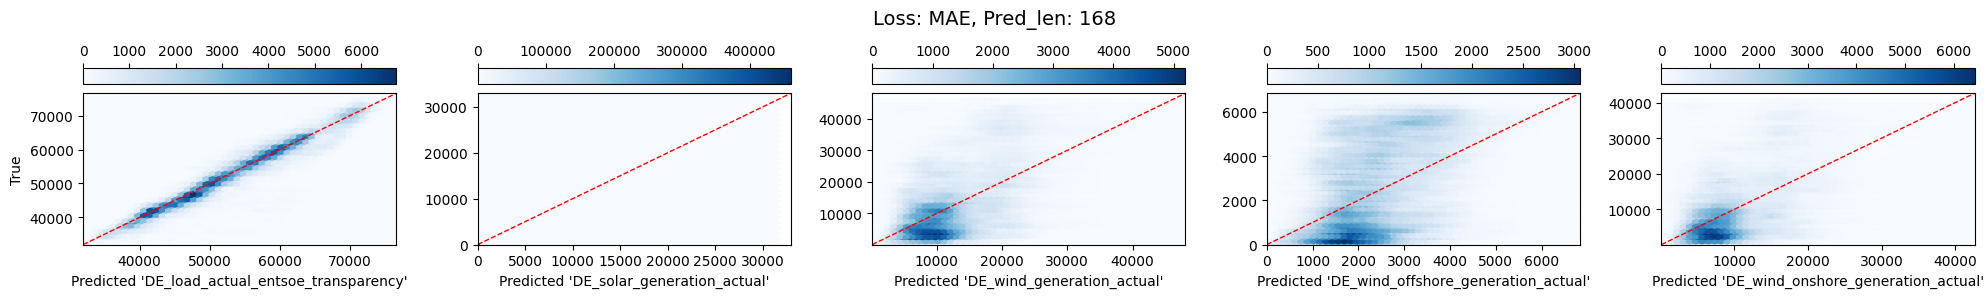

load actual          min value: 31307.00   max value: 75551.00  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


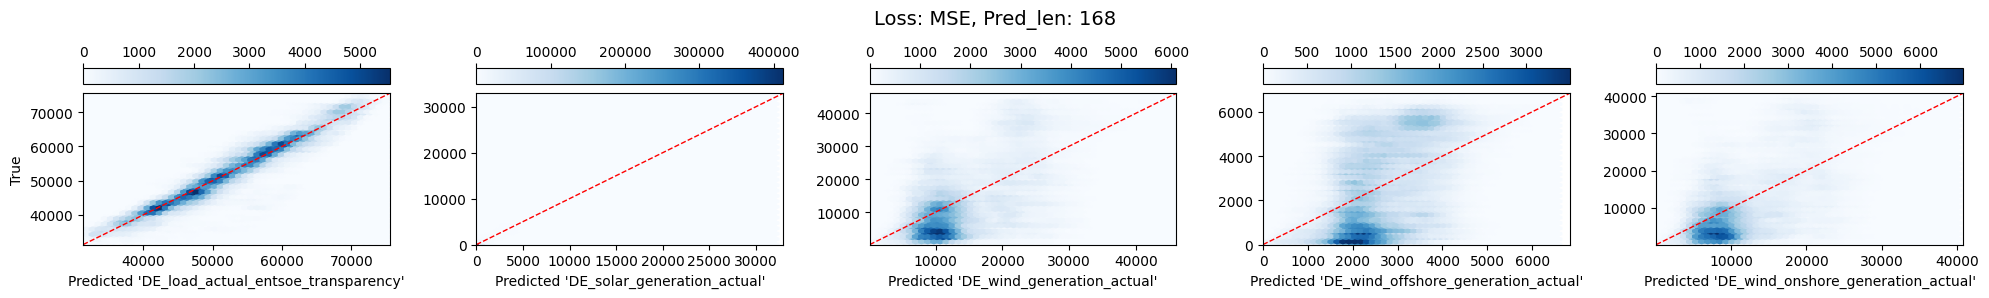

load actual          min value: 31307.00   max value: 75749.61  
solar generation     min value: 0.00       max value: 37344.29  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


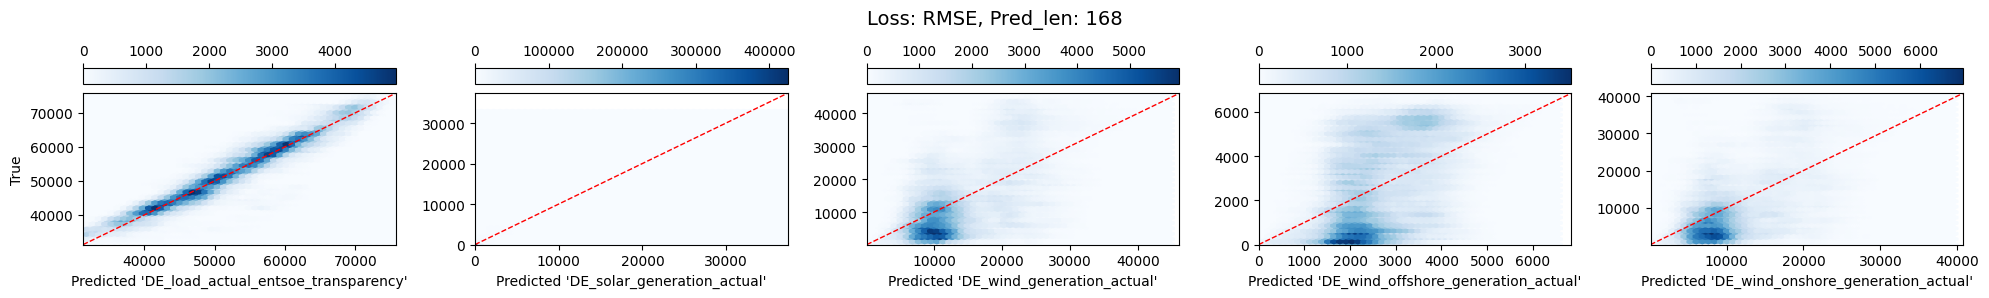

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Extract columns
cols = pd.read_csv("datasets/IT_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("PatchTST", loss, seq_len=512, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_0_1_relu_unscaled')
    print("-"*160)

# 6. MinMax (0, 5) ReLU Informer plots

We plot unscaled data for each column.

The more the line is narrow and corresponds to the 45 degree line and symmetric around it - the better. Please note that we observe such patterns because of original shapes of distributions within our data. 


Dark spots mean more observations.


load actual          min value: 31923.00   max value: 75551.00  
solar generation     min value: 0.00       max value: 32951.61  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


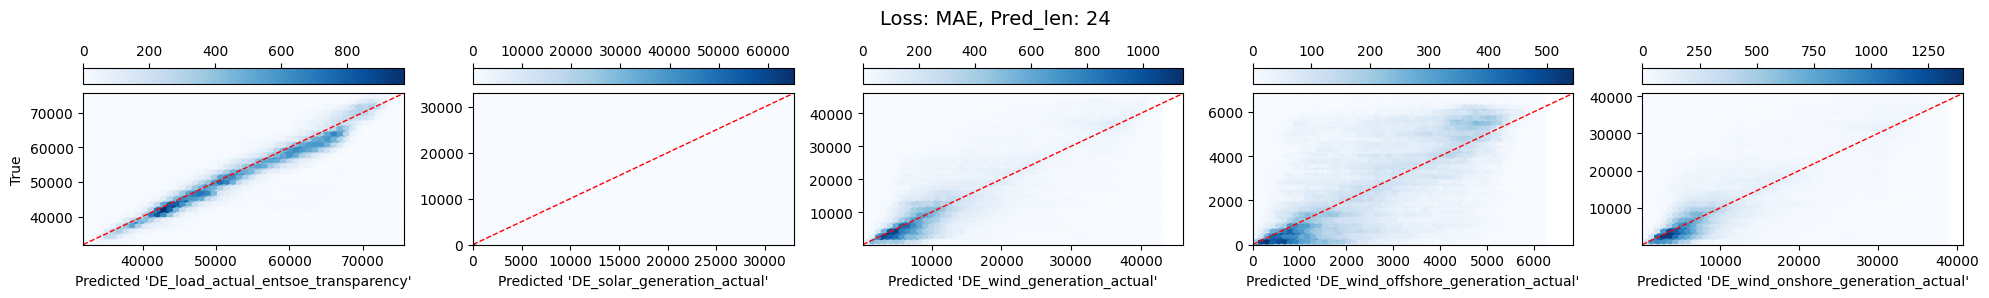

load actual          min value: 31468.38   max value: 75552.53  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


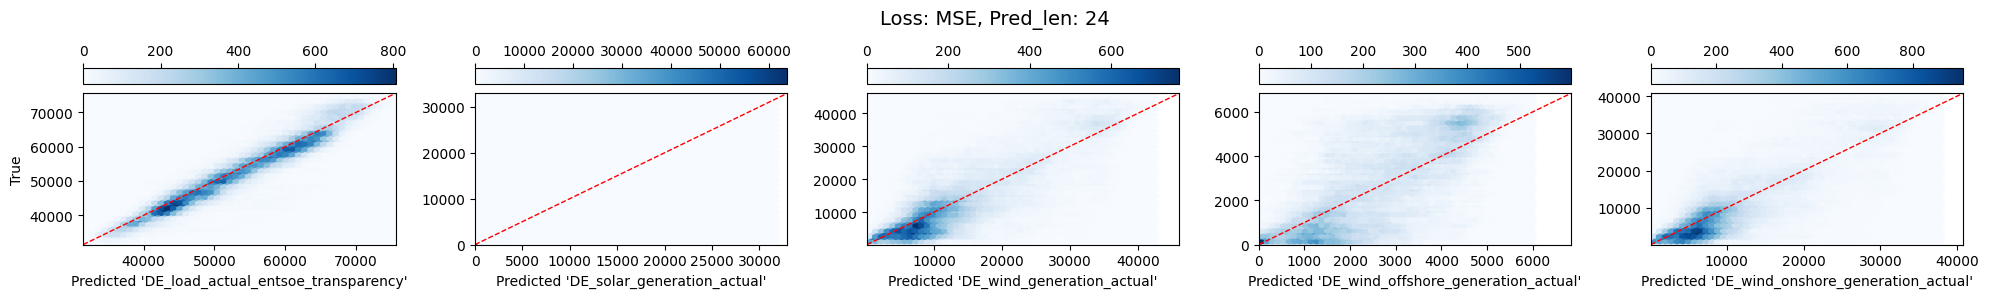

load actual          min value: 31728.07   max value: 75551.00  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


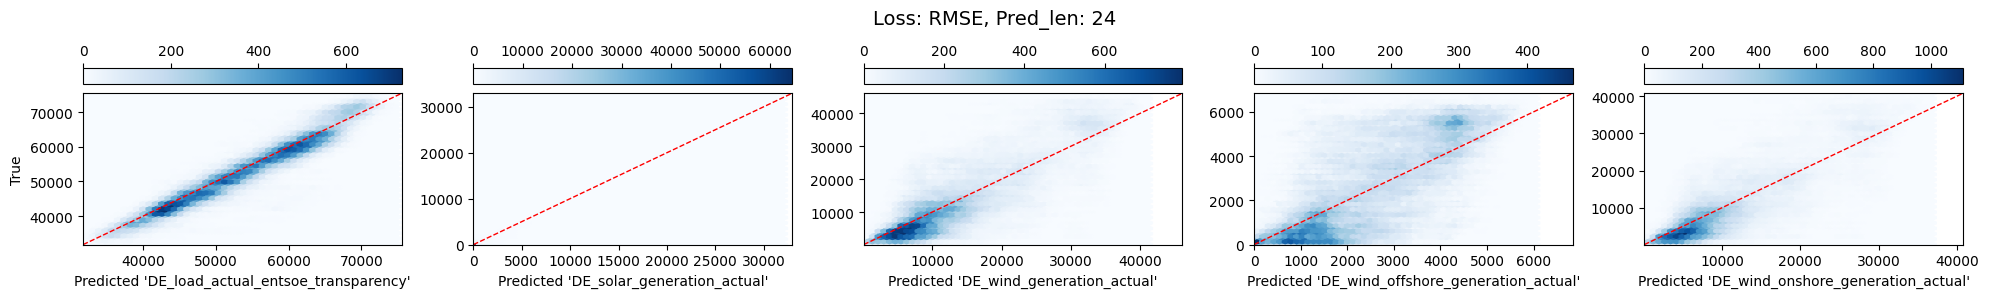

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31923.00   max value: 75615.57  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


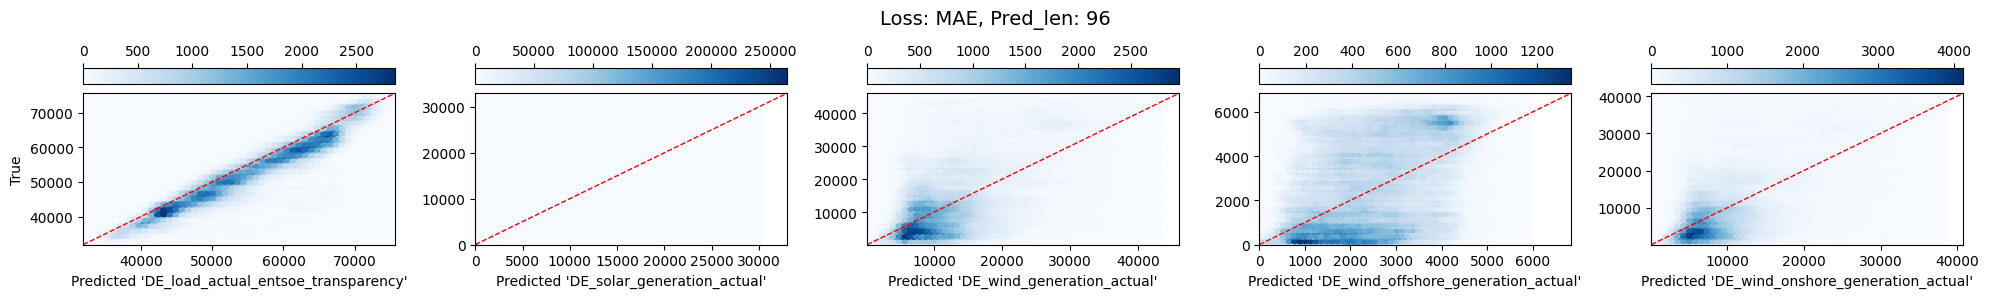

load actual          min value: 31307.00   max value: 76149.77  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


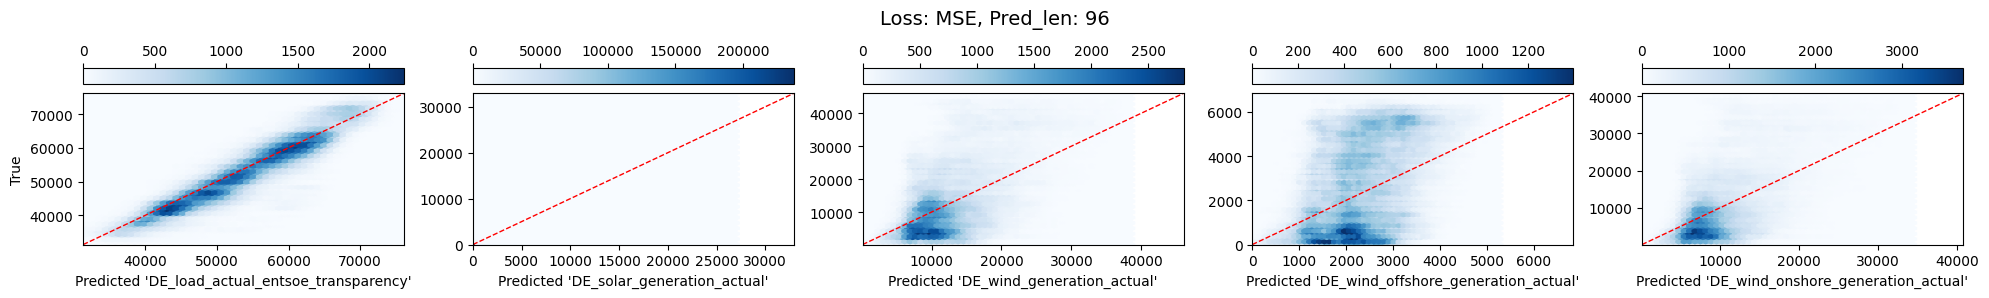

load actual          min value: 31307.00   max value: 77426.69  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


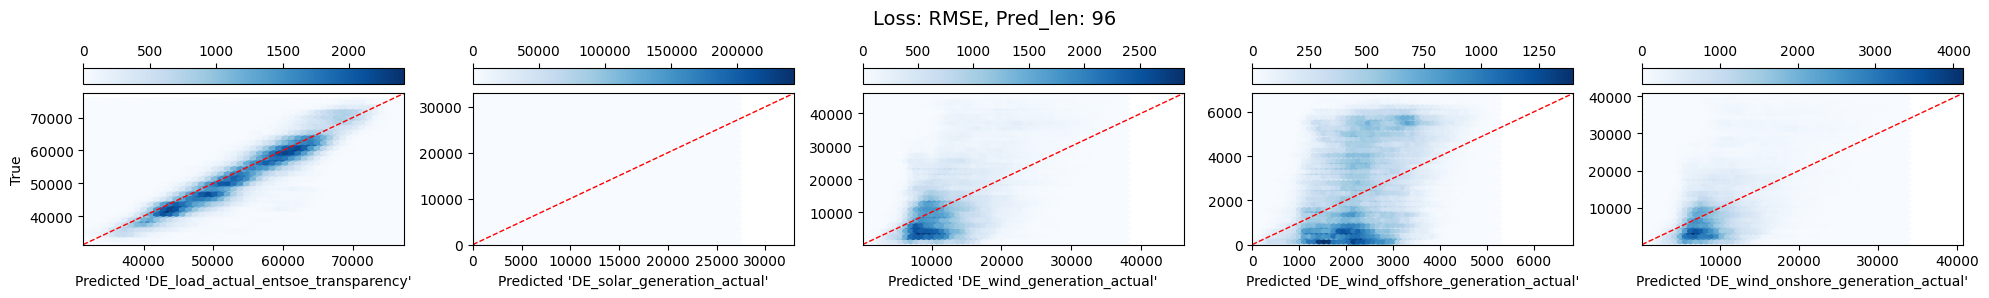

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31923.00   max value: 76016.25  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


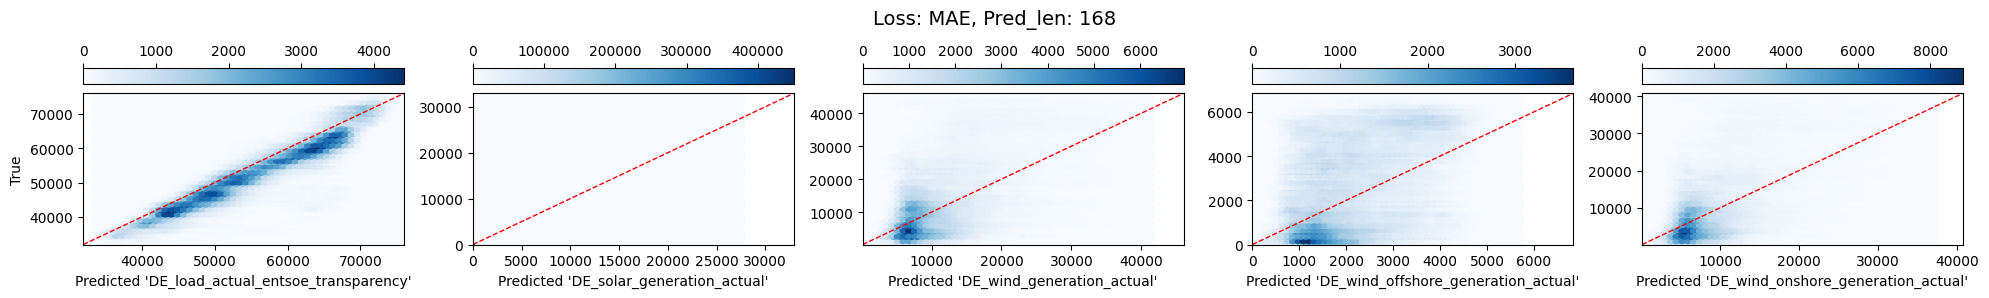

load actual          min value: 31307.00   max value: 80383.12  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


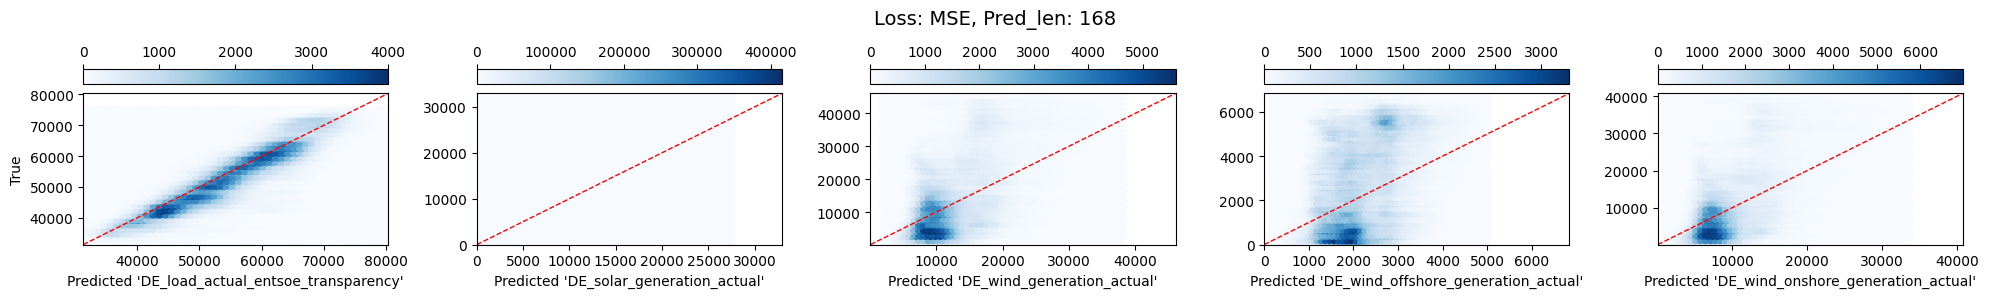

load actual          min value: 31923.00   max value: 76463.03  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


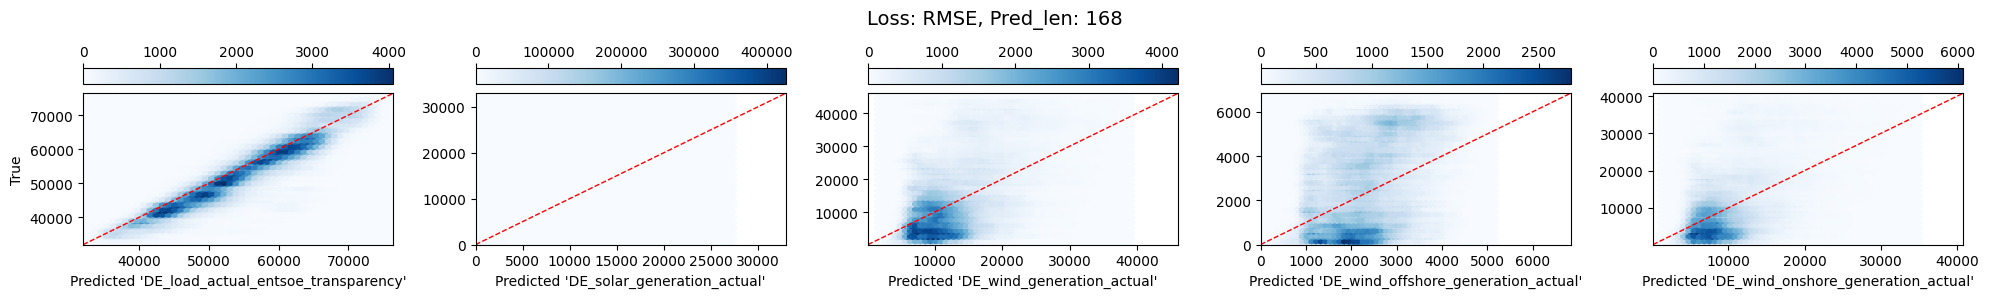

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Extract columns
cols = pd.read_csv("datasets/DE_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("Informer", loss, seq_len=96, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_0_5_relu_unscaled')
    print("-"*160)


# 7. MinMax (0, 5) ReLU PatchTST plots

load actual          min value: 31923.00   max value: 76111.86  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 48961.59  
wind offshore        min value: 0.00       max value: 7384.48   
wind onshore         min value: 119.00     max value: 42643.50  


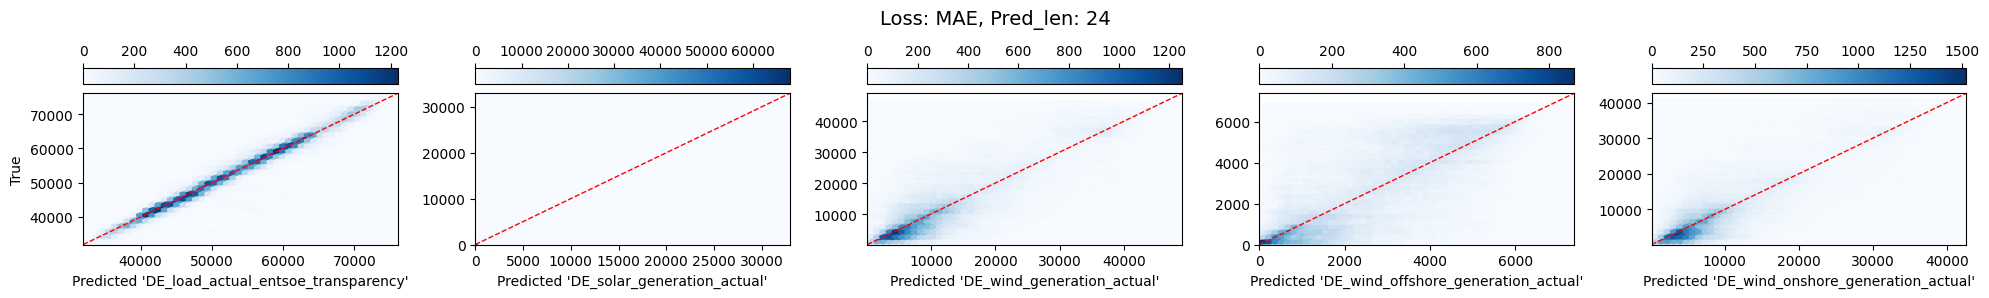

load actual          min value: 31307.00   max value: 76898.62  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 47849.09  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 41619.64  


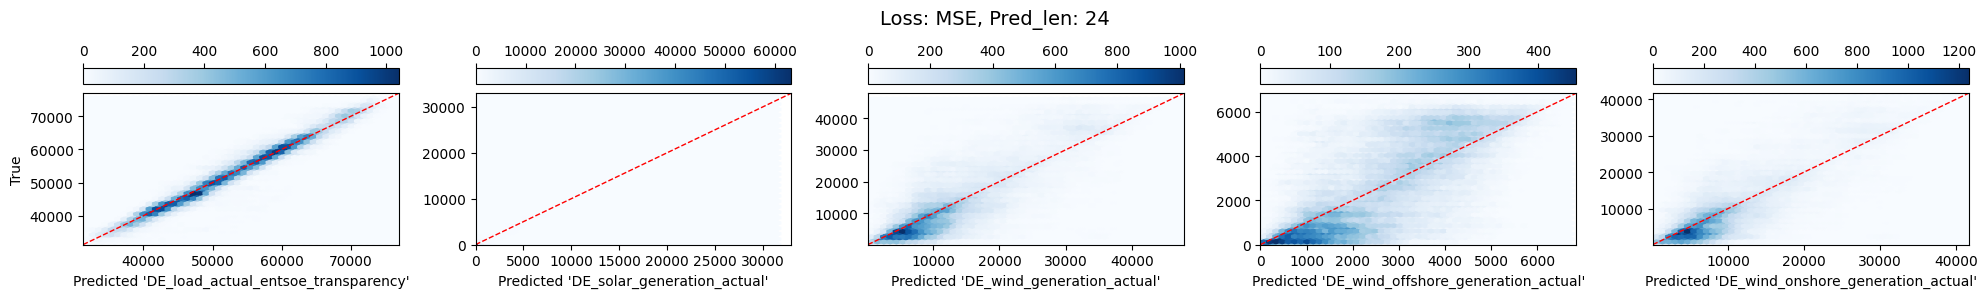

load actual          min value: 31307.00   max value: 76366.70  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 48542.34  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 42163.70  


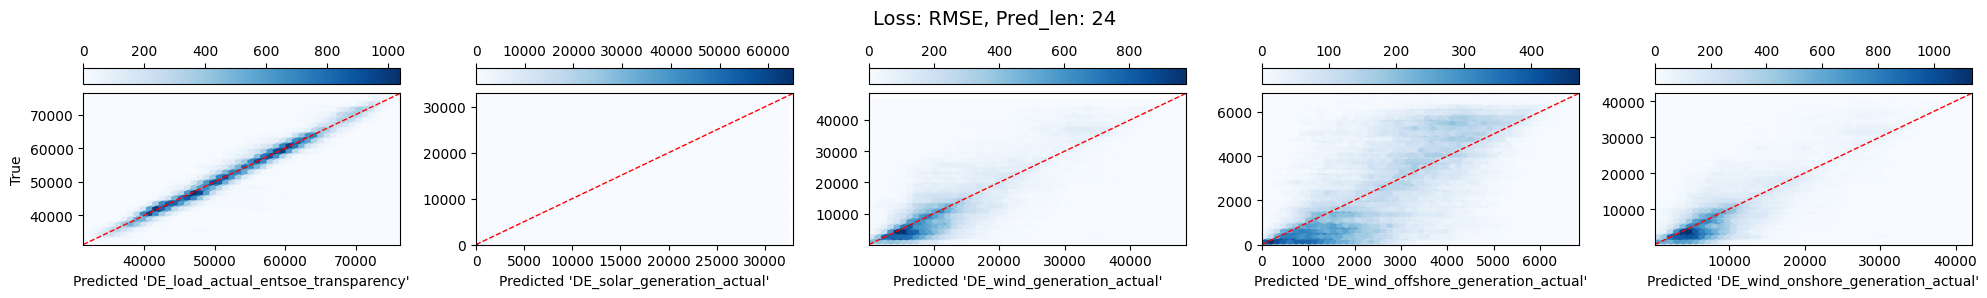

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31599.29   max value: 75551.00  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 47825.69  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 42122.91  


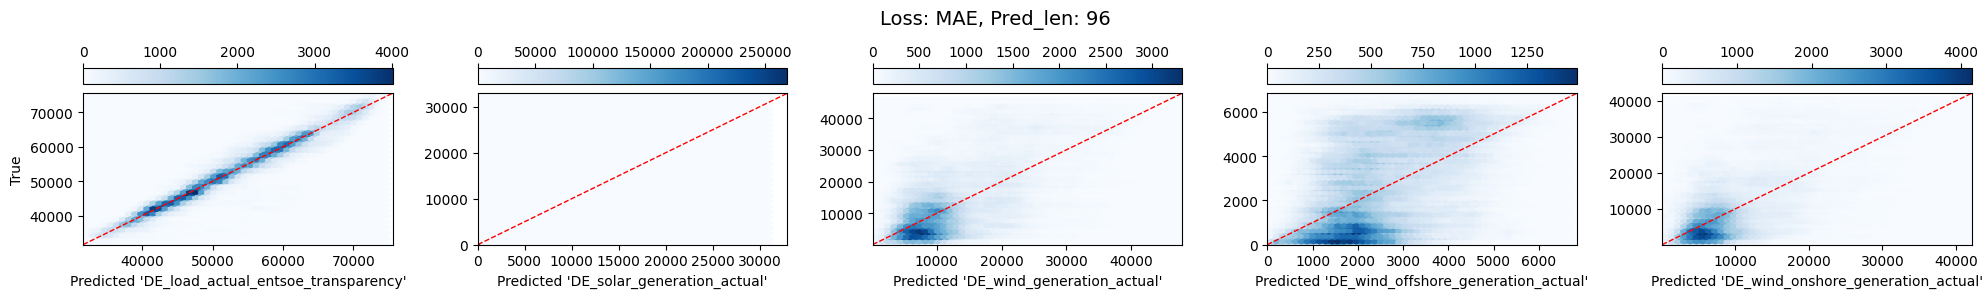

load actual          min value: 31307.00   max value: 75780.16  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 136.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


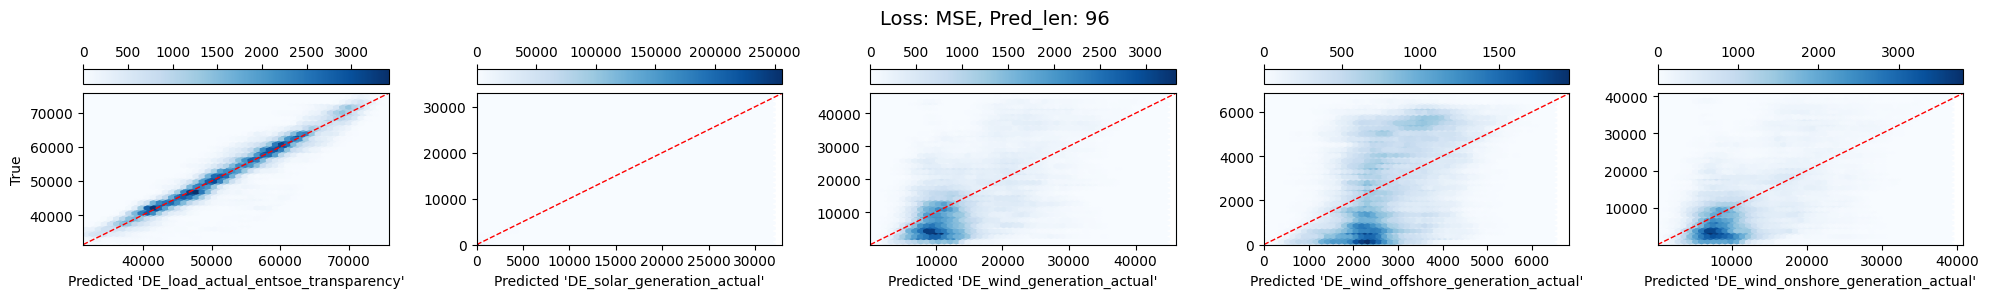

load actual          min value: 31307.00   max value: 75716.78  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


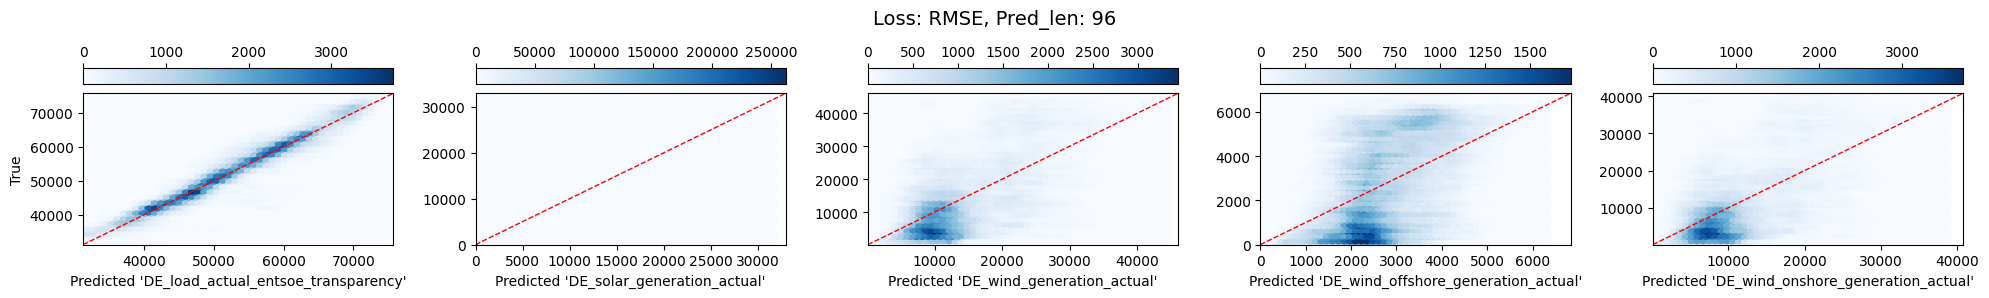

----------------------------------------------------------------------------------------------------------------------------------------------------------------
load actual          min value: 31602.87   max value: 75794.73  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 48126.36  
wind offshore        min value: 0.00       max value: 6923.22   
wind onshore         min value: 119.00     max value: 41954.62  


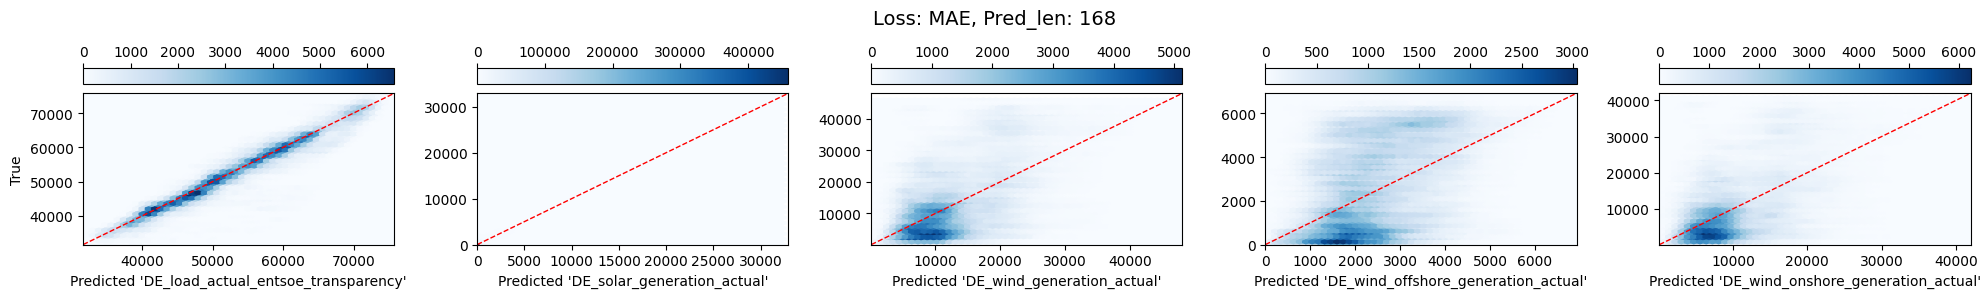

load actual          min value: 31307.00   max value: 75551.00  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


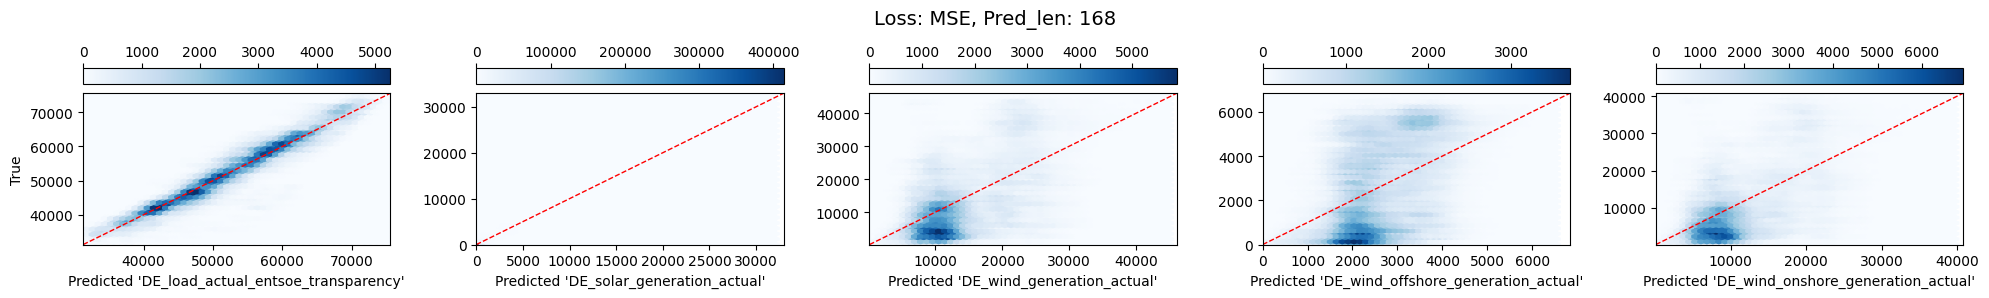

load actual          min value: 31307.00   max value: 75818.14  
solar generation     min value: 0.00       max value: 32947.00  
wind generation      min value: 135.00     max value: 46064.00  
wind offshore        min value: 0.00       max value: 6840.00   
wind onshore         min value: 119.00     max value: 40752.00  


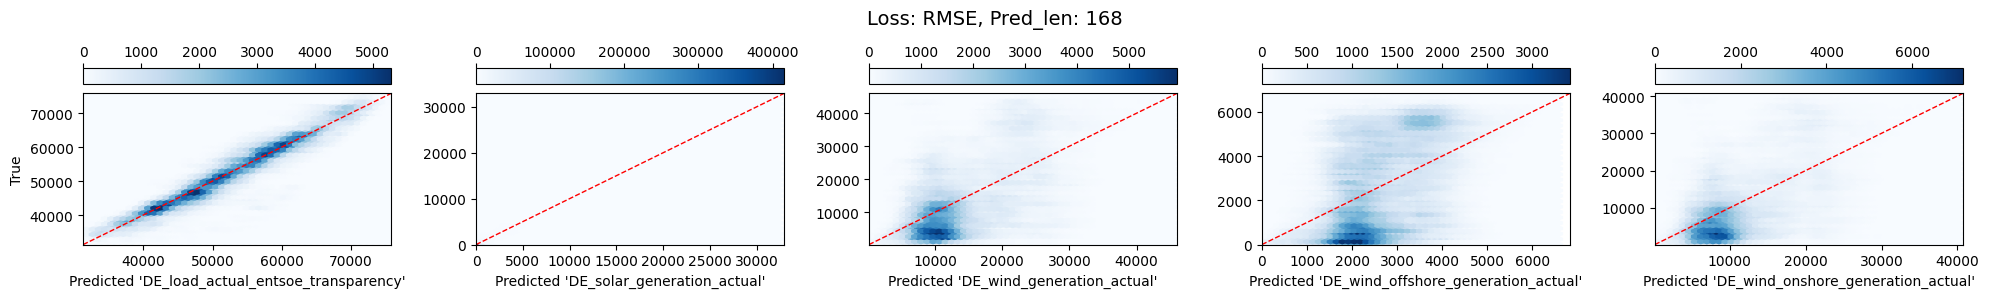

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Extract columns
cols = pd.read_csv("datasets/DE_data.csv").columns[1:]

#color_maps = ["Blues", "Oranges", "Greens"]
color_maps = ["Blues"]*3 # So easier to compare

# Plots
for pred_len in [24, 96, 168]:
    for i, loss in enumerate(["MAE", "MSE", "RMSE"]):
        plot_error_results("PatchTST", loss, seq_len=512, pred_len=pred_len, itr=2, columns=cols, color=color_maps[i], path='./minmax_0_5_relu_unscaled')
    print("-"*160)

In [ ]:
# Delete the folders
shutil.rmtree("minmax_0_1_relu_unscaled")
shutil.rmtree("minmax_0_5_relu_unscaled")
shutil.rmtree("standard_unscaled")
shutil.rmtreee("logs")